### Importing Libraries

In [13]:
import matplotlib.pyplot as plt
from glob import glob
import cv2 as cv
import random
import os


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG,Image

### Preparing dataset

In [14]:
img_size = 48
batch_size = 128

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("fer 2013/train",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("fer 2013/test",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7177 images belonging to 7 classes.


### Defining Model

In [15]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters , kernel_size = kernel_size , padding ="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [16]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 64, (3, 3))
    conv_2 = Convolution(conv_1, 128, (3, 3))
    conv_3 = Convolution(conv_2, 512, (3, 3))
    conv_4 = Convolution(conv_3, 512, (3, 3))
    
    flatten = Flatten()(conv_4)
    
    dense_1 = Dense_f(flatten, 256)
    dense_2 = Dense_f(dense_1, 512)
    
    output = Dense(7, activation="softmax")(dense_2)
    model = Model(inputs=[inputs], outputs=[output])
    
    opt = Adam(lr=0.001)  # Adjust learning rate
    
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [5]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0     

### Model Initialisation

In [17]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model_face3.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')


reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [checkpoint,reduce_learningrate]



model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [18]:
epochs = 35
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

### Training Model

In [19]:
history = model.fit(
x = train_generator,
epochs = epochs,
steps_per_epoch = steps_per_epoch,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks_list)

Epoch 1/35
224/224 [==============================] - ETA: 0s - loss: 0.9530 - accuracy: 0.6419WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 157s 689ms/step - loss: 0.9530 - accuracy: 0.6419 - val_loss: 1.2062 - val_accuracy: 0.5430 - lr: 0.0010
Epoch 2/35
224/224 [==============================] - ETA: 0s - loss: 0.9360 - accuracy: 0.6479WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 199s 890ms/step - loss: 0.9360 - accuracy: 0.6479 - val_loss: 1.0090 - val_accuracy: 0.6214 - lr: 0.0010
Epoch 3/35
224/224 [==============================] - ETA: 0s - loss: 0.9095 - accuracy: 0.6573WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 192s 855ms/step - loss: 0.9095 - accuracy: 0.6573 - val_loss: 1.0574 - val_accuracy: 0.6105 - lr: 0.0010
Epoch 4/35
224/224 [==============================] - ETA: 0s - loss: 0.8829 - accuracy: 0.6690WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 198s 886ms/step - loss: 0.8829 - accuracy: 0.6690 - val_loss: 1.1092 - val_accuracy: 0.5901 - lr: 0.0010
Epoch 5/35
224/224 [==============================] - ETA: 0s - loss: 0.8603 - accuracy: 0.6752WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 214s 956ms/step - loss: 0.8603 - accuracy: 0.6752 - val_loss: 1.2235 - val_accuracy: 0.5529 - lr: 0.0010
Epoch 6/35
224/224 [==============================] - ETA: 0s - loss: 0.7857 - accuracy: 0.7096WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 225s 1s/step - loss: 0.7857 - accuracy: 0.7096 - val_loss: 0.9453 - val_accuracy: 0.6557 - lr: 2.0000e-04
Epoch 7/35
224/224 [==============================] - ETA: 0s - loss: 0.7522 - accuracy: 0.7199WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 199s 888ms/step - loss: 0.7522 - accuracy: 0.7199 - val_loss: 0.9519 - val_accuracy: 0.6578 - lr: 2.0000e-04
Epoch 8/35
224/224 [==============================] - ETA: 0s - loss: 0.7286 - accuracy: 0.7277WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 198s 882ms/step - loss: 0.7286 - accuracy: 0.7277 - val_loss: 0.9834 - val_accuracy: 0.6508 - lr: 2.0000e-04
Epoch 9/35
224/224 [==============================] - ETA: 0s - loss: 0.7118 - accuracy: 0.7339WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 9: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
224/224 [==============================] - 199s 886ms/step - loss: 0.7118 - accuracy: 0.7339 - val_loss: 0.9710 - val_accuracy: 0.6551 - lr: 2.0000e-04
Epoch 10/35
224/224 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.7388WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 223s 995ms/step - loss: 0.6918 - accuracy: 0.7388 - val_loss: 0.9481 - val_accuracy: 0.6632 - lr: 4.0000e-05
Epoch 11/35
224/224 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.7433WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 204s 908ms/step - loss: 0.6908 - accuracy: 0.7433 - val_loss: 0.9561 - val_accuracy: 0.6617 - lr: 4.0000e-05
Epoch 12/35
224/224 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.7478WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 12: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
224/224 [==============================] - 202s 901ms/step - loss: 0.6774 - accuracy: 0.7478 - val_loss: 0.9574 - val_accuracy: 0.6617 - lr: 4.0000e-05
Epoch 13/35
224/224 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.7509WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 205s 915ms/step - loss: 0.6713 - accuracy: 0.7509 - val_loss: 0.9546 - val_accuracy: 0.6649 - lr: 8.0000e-06
Epoch 14/35
224/224 [==============================] - ETA: 0s - loss: 0.6708 - accuracy: 0.7517WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 197s 879ms/step - loss: 0.6708 - accuracy: 0.7517 - val_loss: 0.9514 - val_accuracy: 0.6666 - lr: 8.0000e-06
Epoch 15/35
224/224 [==============================] - ETA: 0s - loss: 0.6673 - accuracy: 0.7534WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 15: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
224/224 [==============================] - 202s 900ms/step - loss: 0.6673 - accuracy: 0.7534 - val_loss: 0.9509 - val_accuracy: 0.6643 - lr: 8.0000e-06
Epoch 16/35
224/224 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.7509WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 203s 907ms/step - loss: 0.6699 - accuracy: 0.7509 - val_loss: 0.9579 - val_accuracy: 0.6634 - lr: 1.6000e-06
Epoch 17/35
224/224 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.7518WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 200s 891ms/step - loss: 0.6709 - accuracy: 0.7518 - val_loss: 0.9487 - val_accuracy: 0.6643 - lr: 1.6000e-06
Epoch 18/35
224/224 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.7474WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 18: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
224/224 [==============================] - 202s 901ms/step - loss: 0.6720 - accuracy: 0.7474 - val_loss: 0.9555 - val_accuracy: 0.6646 - lr: 1.6000e-06
Epoch 19/35
224/224 [==============================] - ETA: 0s - loss: 0.6679 - accuracy: 0.7514WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 203s 905ms/step - loss: 0.6679 - accuracy: 0.7514 - val_loss: 0.9569 - val_accuracy: 0.6622 - lr: 3.2000e-07
Epoch 20/35
224/224 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.7516WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 314s 1s/step - loss: 0.6621 - accuracy: 0.7516 - val_loss: 0.9578 - val_accuracy: 0.6607 - lr: 3.2000e-07
Epoch 21/35
224/224 [==============================] - ETA: 0s - loss: 0.6689 - accuracy: 0.7488WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 21: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
224/224 [==============================] - 378s 2s/step - loss: 0.6689 - accuracy: 0.7488 - val_loss: 0.9490 - val_accuracy: 0.6657 - lr: 3.2000e-07
Epoch 22/35
224/224 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.7505WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 910s 4s/step - loss: 0.6698 - accuracy: 0.7505 - val_loss: 0.9557 - val_accuracy: 0.6659 - lr: 6.4000e-08
Epoch 23/35
224/224 [==============================] - ETA: 0s - loss: 0.6664 - accuracy: 0.7533WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 379s 2s/step - loss: 0.6664 - accuracy: 0.7533 - val_loss: 0.9488 - val_accuracy: 0.6660 - lr: 6.4000e-08
Epoch 24/35
224/224 [==============================] - ETA: 0s - loss: 0.6643 - accuracy: 0.7525WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 24: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
224/224 [==============================] - 381s 2s/step - loss: 0.6643 - accuracy: 0.7525 - val_loss: 0.9488 - val_accuracy: 0.6676 - lr: 6.4000e-08
Epoch 25/35
224/224 [==============================] - ETA: 0s - loss: 0.6606 - accuracy: 0.7517WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 379s 2s/step - loss: 0.6606 - accuracy: 0.7517 - val_loss: 0.9546 - val_accuracy: 0.6603 - lr: 1.2800e-08
Epoch 26/35
224/224 [==============================] - ETA: 0s - loss: 0.6689 - accuracy: 0.7501WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 381s 2s/step - loss: 0.6689 - accuracy: 0.7501 - val_loss: 0.9530 - val_accuracy: 0.6650 - lr: 1.2800e-08
Epoch 27/35
224/224 [==============================] - ETA: 0s - loss: 0.6681 - accuracy: 0.7524WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 27: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
224/224 [==============================] - 380s 2s/step - loss: 0.6681 - accuracy: 0.7524 - val_loss: 0.9541 - val_accuracy: 0.6636 - lr: 1.2800e-08
Epoch 28/35
224/224 [==============================] - ETA: 0s - loss: 0.6649 - accuracy: 0.7526WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 316s 1s/step - loss: 0.6649 - accuracy: 0.7526 - val_loss: 0.9545 - val_accuracy: 0.6645 - lr: 2.5600e-09
Epoch 29/35
224/224 [==============================] - ETA: 0s - loss: 0.6674 - accuracy: 0.7508WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 182s 811ms/step - loss: 0.6674 - accuracy: 0.7508 - val_loss: 0.9540 - val_accuracy: 0.6632 - lr: 2.5600e-09
Epoch 30/35
224/224 [==============================] - ETA: 0s - loss: 0.6734 - accuracy: 0.7479WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 30: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
224/224 [==============================] - 196s 875ms/step - loss: 0.6734 - accuracy: 0.7479 - val_loss: 0.9560 - val_accuracy: 0.6593 - lr: 2.5600e-09
Epoch 31/35
224/224 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.7507WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 201s 898ms/step - loss: 0.6718 - accuracy: 0.7507 - val_loss: 0.9503 - val_accuracy: 0.6659 - lr: 5.1200e-10
Epoch 32/35
224/224 [==============================] - ETA: 0s - loss: 0.6680 - accuracy: 0.7508WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 195s 870ms/step - loss: 0.6680 - accuracy: 0.7508 - val_loss: 0.9556 - val_accuracy: 0.6611 - lr: 5.1200e-10
Epoch 33/35
224/224 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.7534WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 33: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
224/224 [==============================] - 189s 843ms/step - loss: 0.6665 - accuracy: 0.7534 - val_loss: 0.9521 - val_accuracy: 0.6635 - lr: 5.1200e-10
Epoch 34/35
224/224 [==============================] - ETA: 0s - loss: 0.6690 - accuracy: 0.7500WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 200s 891ms/step - loss: 0.6690 - accuracy: 0.7500 - val_loss: 0.9558 - val_accuracy: 0.6645 - lr: 1.0240e-10
Epoch 35/35
224/224 [==============================] - ETA: 0s - loss: 0.6679 - accuracy: 0.7494WARNING:tensorflow:Can save best model only with val_acc available, skipping.


224/224 [==============================] - 196s 877ms/step - loss: 0.6679 - accuracy: 0.7494 - val_loss: 0.9527 - val_accuracy: 0.6621 - lr: 1.0240e-10


### Evaluating Model

In [20]:
model.evaluate(validation_generator)

57/57 [==============================] - 11s 198ms/step - loss: 0.9520 - accuracy: 0.6660


[0.9520290493965149, 0.6660164594650269]

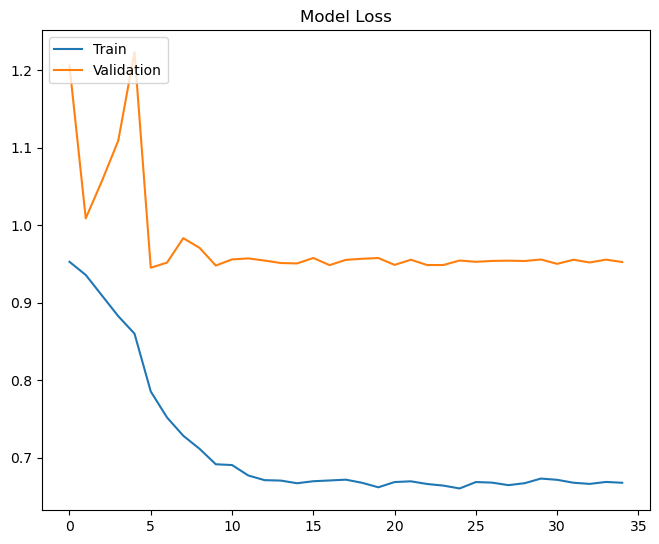

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom = 0.0,right = 0.95,left = 0.0,hspace = 0.25,wspace = 0.35)

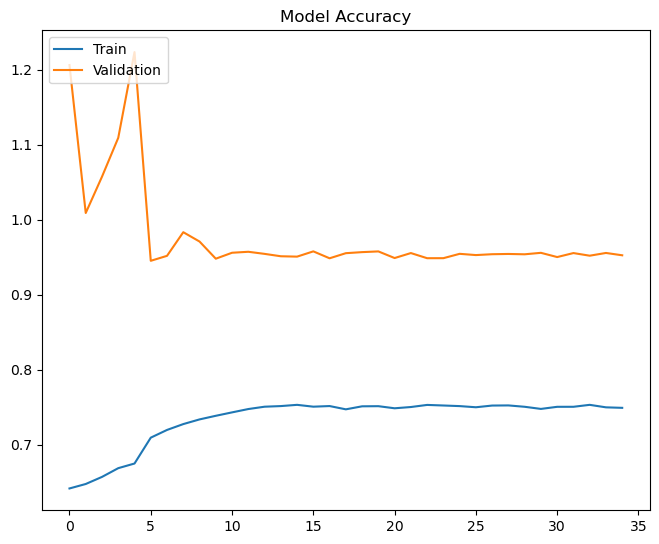

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom = 0.0,right = 0.95,left = 0.0,hspace = 0.25,wspace = 0.35)

In [24]:
model_json = model.to_json()
with open("model_face.json","w") as json_file:
    json_file.write(model_json)

In [25]:
model.save('model_face.h5')

C:\Users\Acer\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
